# <span style="color:#9c8f8f"> 75.06/95.58 Organización de Datos</span>
# <span style="color:#9c8f8f"> Análisis exploratorio: Real or Not? NLP with Disaster Tweets</span>

# <center>FEATURE ENGINEERING</center>
# <center>Random Forest</center>

In [267]:
# Cargo librerias

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

In [173]:
# Cargo train and test

dtype_train = {"id": np.int32, "keyword": "category", "target" : int}
train = pd.read_csv("original_data/train.csv", dtype = dtype_train, encoding='UTF_8')

In [174]:
# Creo dataframe con target

target_train = train[["id","target"]]

In [175]:
DIR_CSV = "features/"

# I) Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

# II) Auxiliary Functions

In [366]:
#Analisis de features y la importancia de c/u
def get_eficiencia_features_de (df, cantidad_arboles, profundidad_cada_arbol):
    # "desde_col" toma la columna desde la cual se van a evaluar los features
    # "hasta_col" toma la columna hasta la cual se van a evaluar los features
    # "on_col" toma la unica columna para la cual se van a calcular los features que van entre (desde_col,hasta_col)
    vector_aux = []
    on_col = 1
    desde_col = on_col + 1
    hasta_col = -1 #len(df.columns.tolist())
    X,y = df.iloc[:,desde_col:hasta_col] , df.iloc[:,on_col]
    X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2, random_state = 123)
    rf_model = RandomForestClassifier(random_state = 1, n_estimators = cantidad_arboles, max_depth = profundidad_cada_arbol)
    rf_model.fit(X_train,y_train)
    predicciones = rf_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,predicciones)) 
    feature_importances = rf_model.feature_importances_
    feature_estimators = rf_model.estimators_[0]
    vector_aux.append(X_train)
    vector_aux.append(rmse)
    vector_aux.append(feature_importances)
    vector_aux.append(feature_estimators)
    return vector_aux

In [374]:
#Plot de feature importance con RF
def bar_plot_feature_importance (X_train, feature_importance):
    plt.bar(X_train.columns, feature_importance)
    plt.xlabel ('features')
    plt.ylabel ('importancia')
    plt.title ('importancia features con RF')
    plt.rcParams["figure.figsize"] = (10,10)
    plt.xticks(rotation='vertical')
    plt.show()

In [368]:
#Plot de grafica de estimadores y diagrama de arbol
def bar_plot_feature_estimators (X_train, feature_estimators):
    plt.bar(X_train.columns, feature_estimators.feature_importances_)
    plt.xlabel('features')
    plt.ylabel('importancia')
    plt.title('importancia features del arbol')
    plt.xticks(rotation='vertical')
    plt.show
    fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10,10), dpi = 200)
    tree.plot_tree(feature_estimators, feature_names = X_train.columns, filled = True)

In [369]:
#Standariza a cierto formato los csv input
def csv_to_df_standarized(doc_csv):
    df = pd.read_csv(doc_csv)
    df = df.drop(df.columns[0],axis=1)
    return df

In [371]:
#Toma todos los csv con features numericos y los procesa
def analisis_de_todos_los_features_numericos(docs):
    for doc in docs:
        df_actual = csv_to_df_standarized(doc)
        vectorcito_actual = get_eficiencia_features_de(df_actual,3,6)
        print('RMSE: %f' % vectorcito_actual[1])
        puntaje_ordenado_descendente = np.sort(vectorcito_actual[2])[::-1]
        print(puntaje_ordenado_descendente[:20])
        bar_plot_feature_importance(vectorcito_actual[0],puntaje_ordenado_descendente)
        #bar_plot_feature_importance(vectorcito_actual[0],vectorcito_actual[2])
        bar_plot_feature_estimators(vectorcito_actual[0],vectorcito_actual[3])

# III) Random Forest

## III)a) Numerical


In [376]:
docs_features_numericos = ['features/train/features_city_in_text_encoded.csv','features/train/features_keywords_numerical.csv']

RMSE: 0.000000
[0.45250893 0.10892547 0.08194179 0.06270583 0.06216808 0.06165986
 0.05103639 0.04675916 0.0408898  0.03140469 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


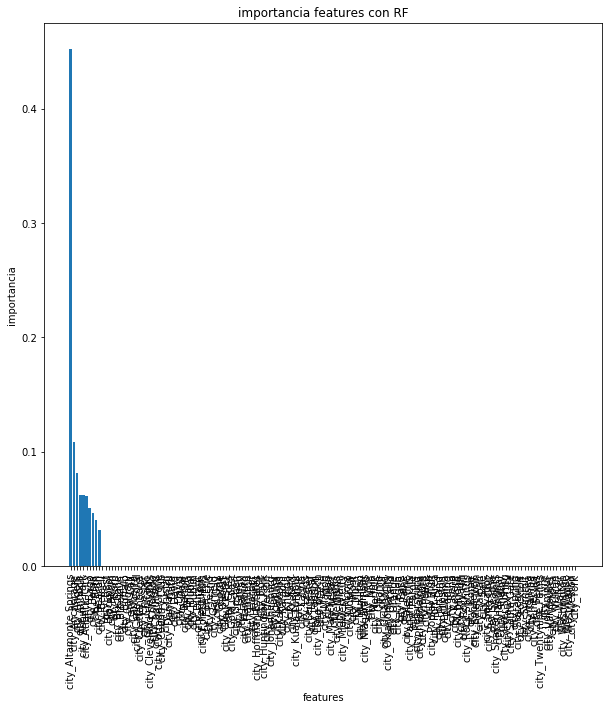

RMSE: 0.591580
[0.45657225 0.45586182 0.07512996 0.0076623  0.00477367]


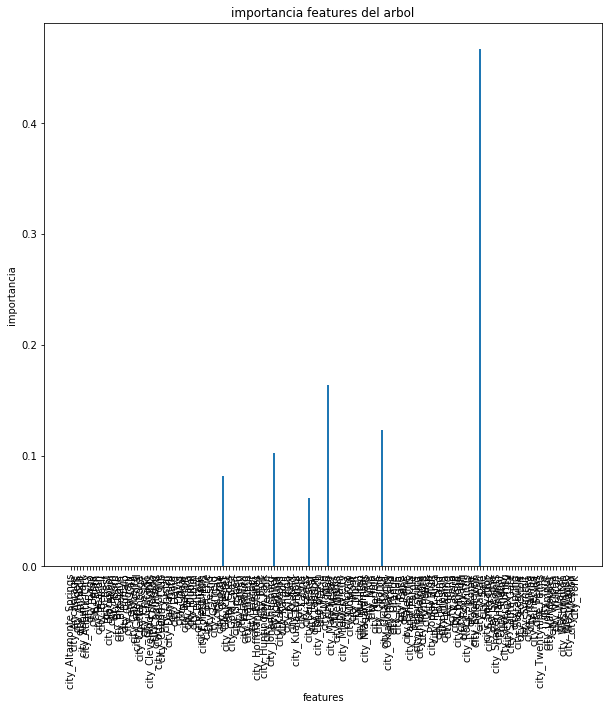

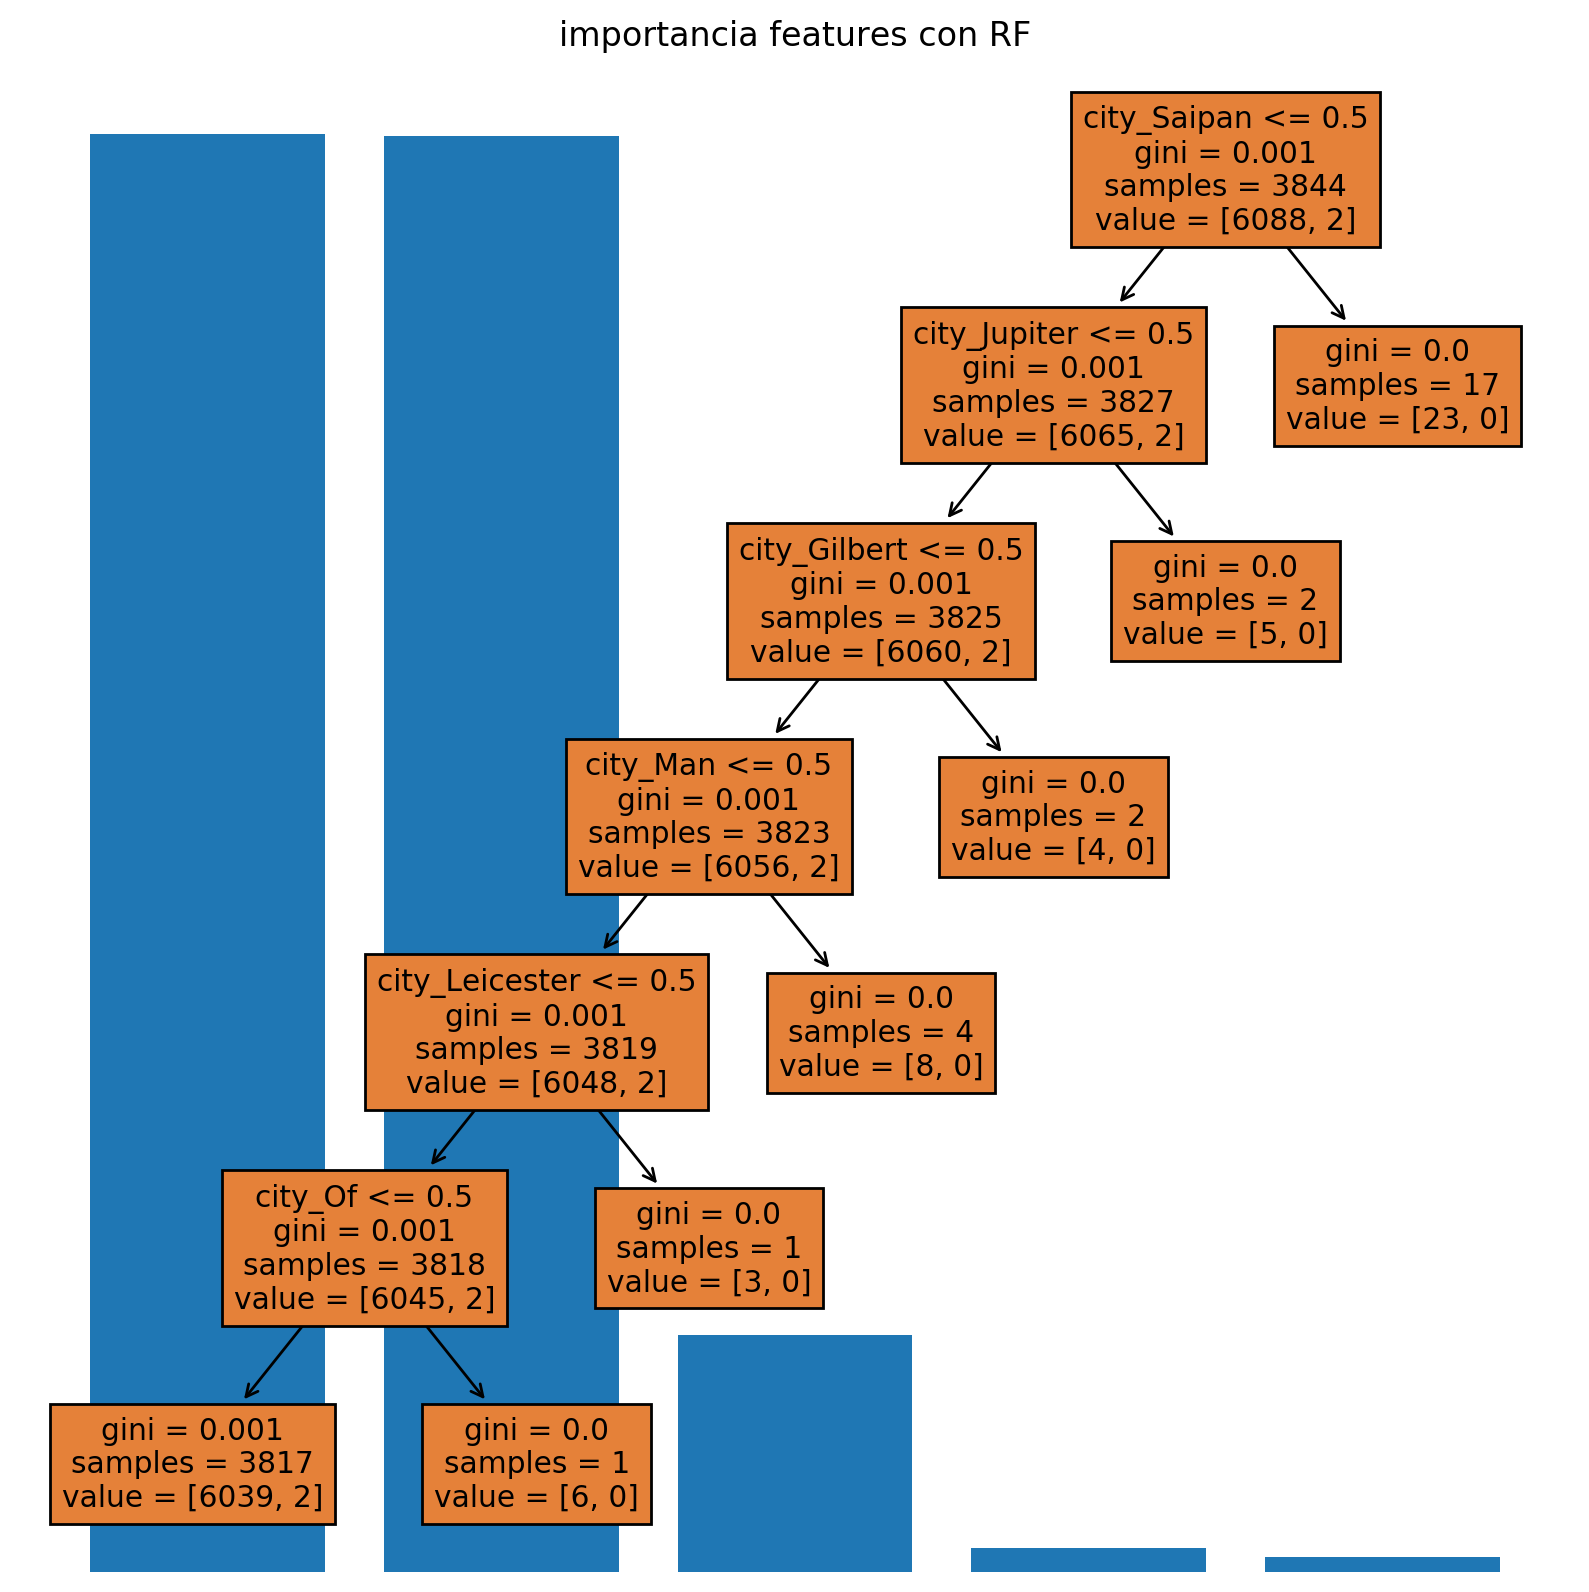

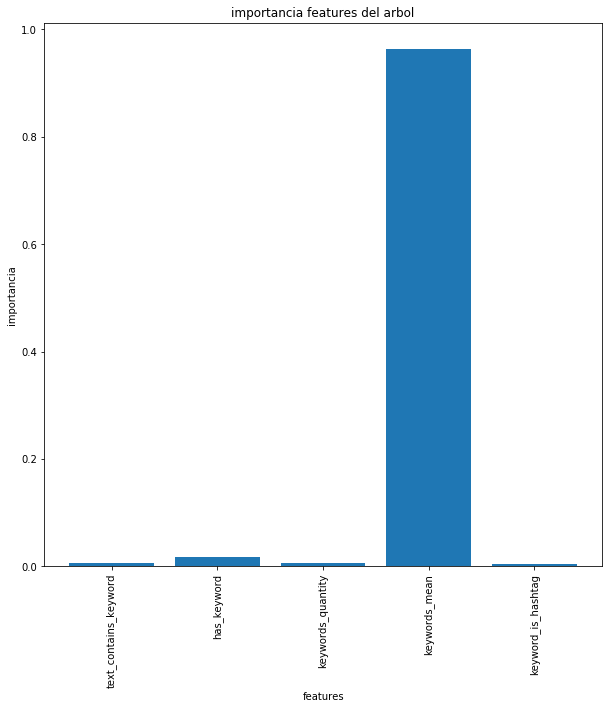

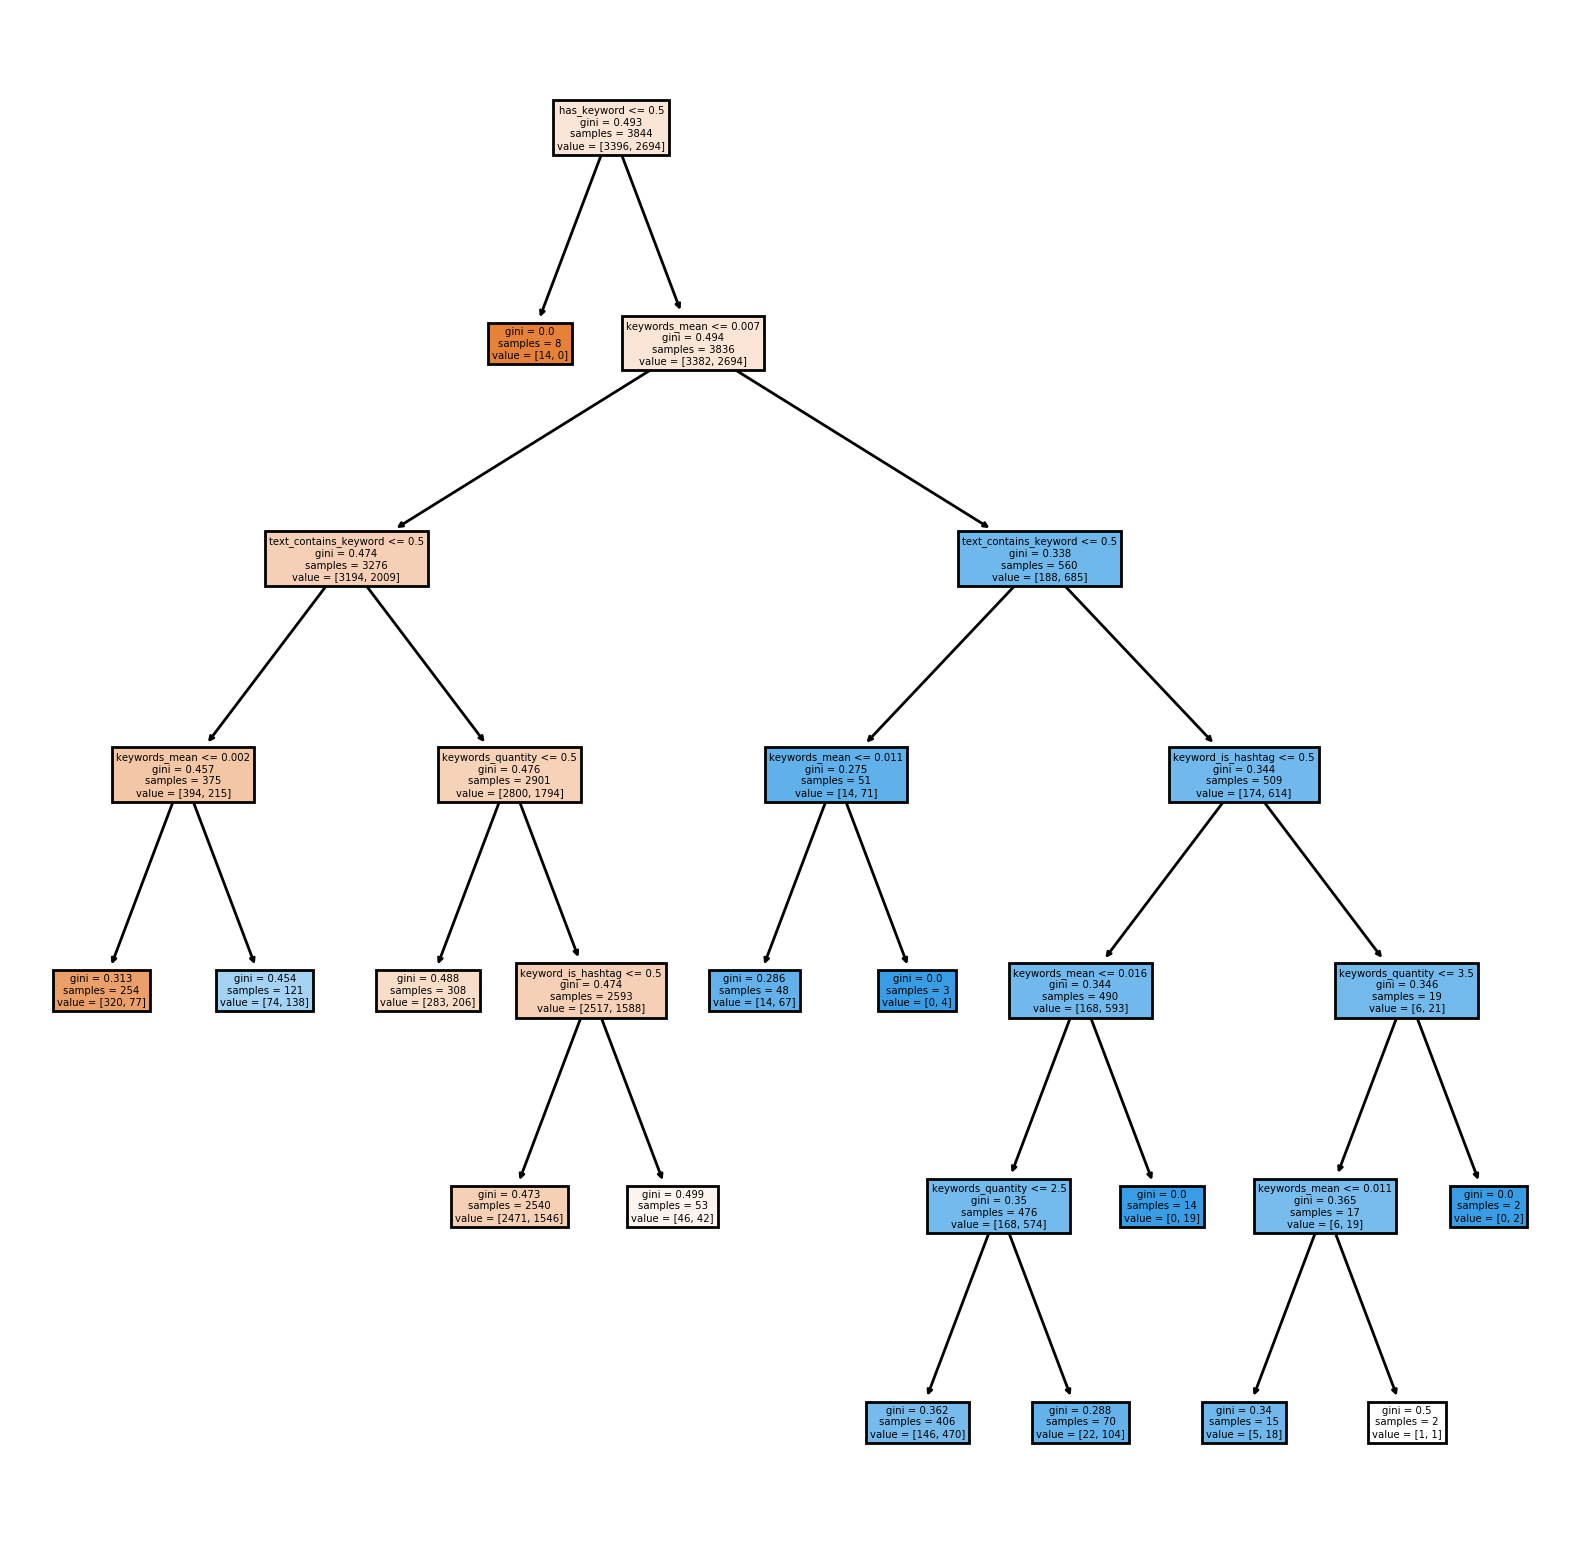

In [377]:
analisis_de_todos_los_features_numericos(docs_features_numericos)